<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221109_Student_Performance_Analysis_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/05/21/data-science-project-student-performance-analysis-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [3]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 32.9 MB/s 
     |████████████████████████████████| 11.2 MB 53.0 MB/s 
     |████████████████████████████████| 965 kB 57.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [12]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 37.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dabl 0.2.4 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [13]:
import pandas as pd
import numpy as np

from pandas.plotting import radviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

from google.colab import files
import io

import warnings

from math import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [14]:
upload = files.upload()
data = pd.read_csv(io.BytesIO(upload['StudentsPerformance.csv']))
data.head()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [18]:
data.isnull().sum() / data.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

Target looks like regression


 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cac8eb150>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca9994890>,
       dtype=object)]

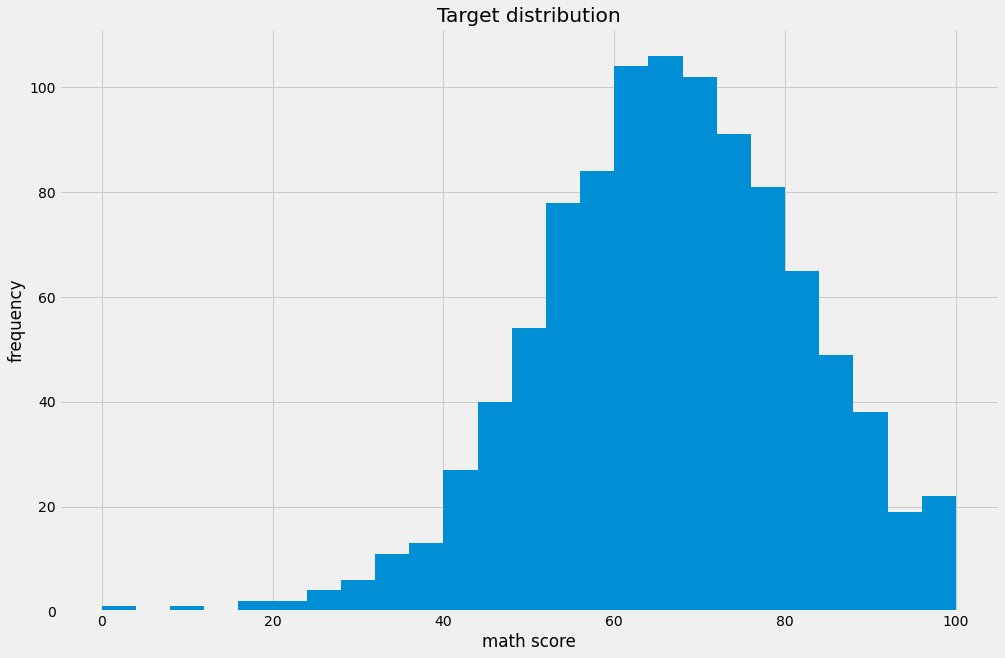

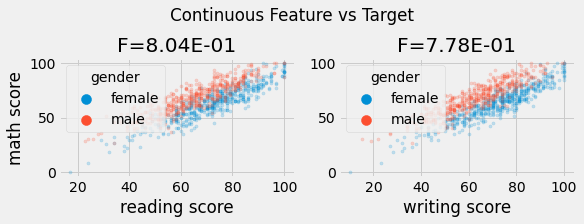

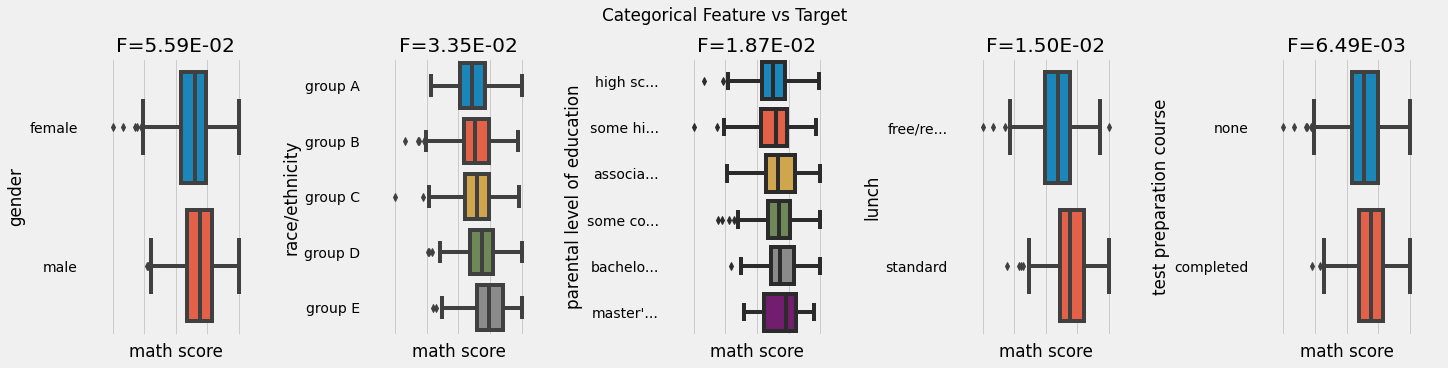

In [19]:
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col='math score')

Target looks like regression


 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca78fcbd0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca787b890>,
       dtype=object)]

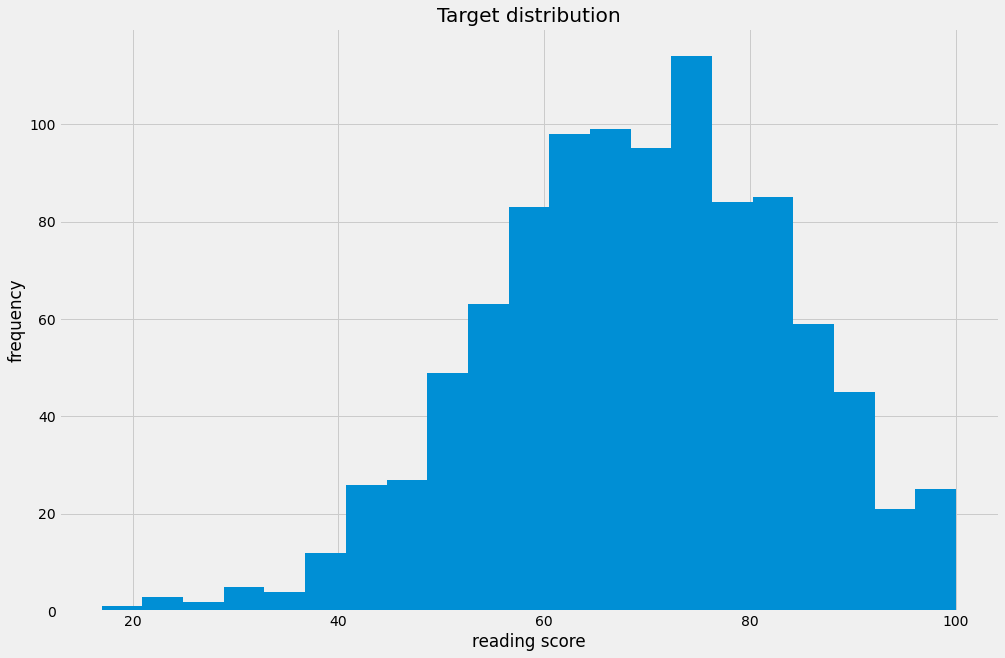

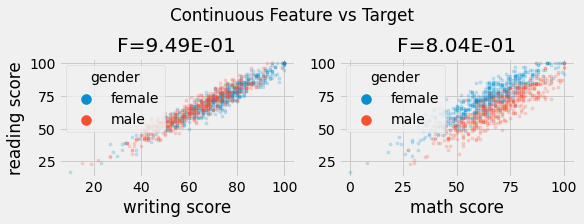

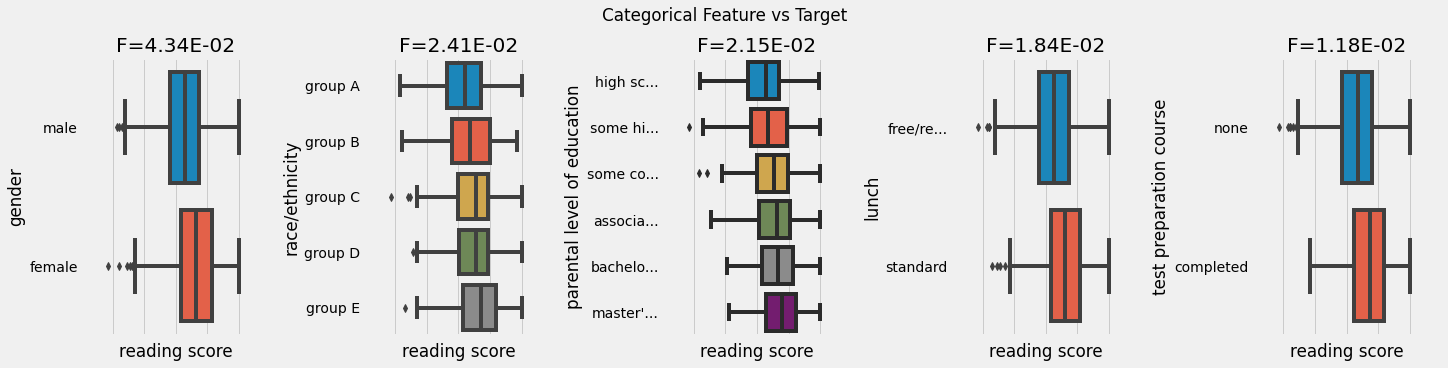

In [20]:
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col='reading score')

In [22]:
data[['lunch', 'gender', 'math score', 'writing score', 'reading score']].groupby(['gender', 'lunch']).agg('median')

math score  writing score  reading score
gender lunch                                                 
female free/reduced        57.0           68.0           67.0
       standard            67.0           76.0           75.0
male   free/reduced        62.0           59.0           61.0
       standard            72.0           67.0           67.5

In [23]:
data[['test preparation course', 'gender', 'math score', 'writing score', 'reading score']].groupby(['gender', 'test preparation course']).agg('median')

math score  writing score  reading score
gender test preparation course                                          
female completed                      67.0           79.0           78.0
       none                           62.0           70.0           71.0
male   completed                      73.0           70.0           71.0
       none                           67.0           60.0           63.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


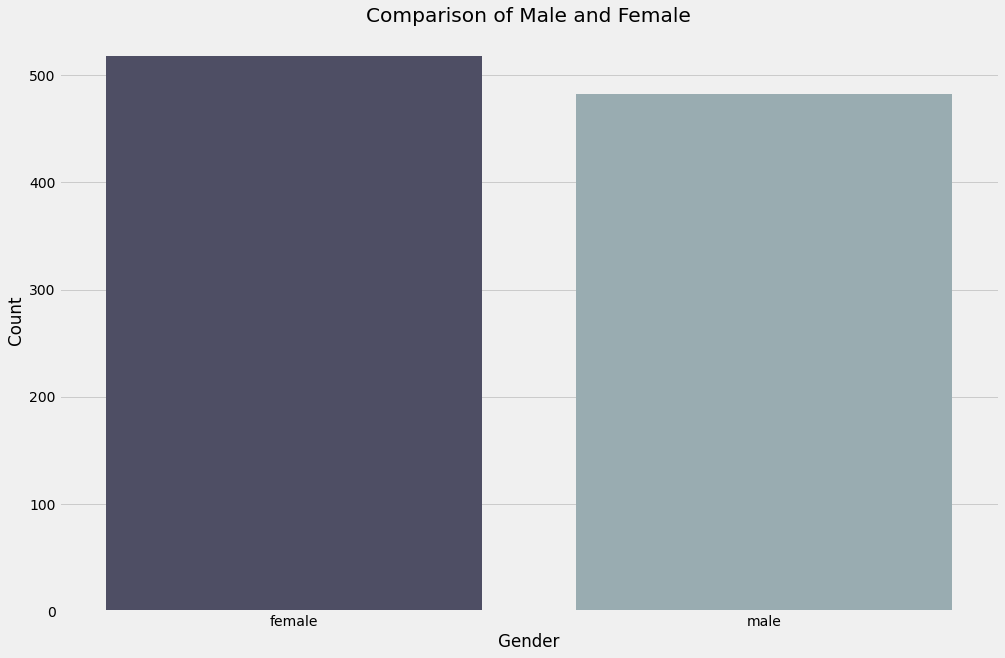

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(data['gender'], palette='bone')
plt.title('Comparison of Male and Female', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


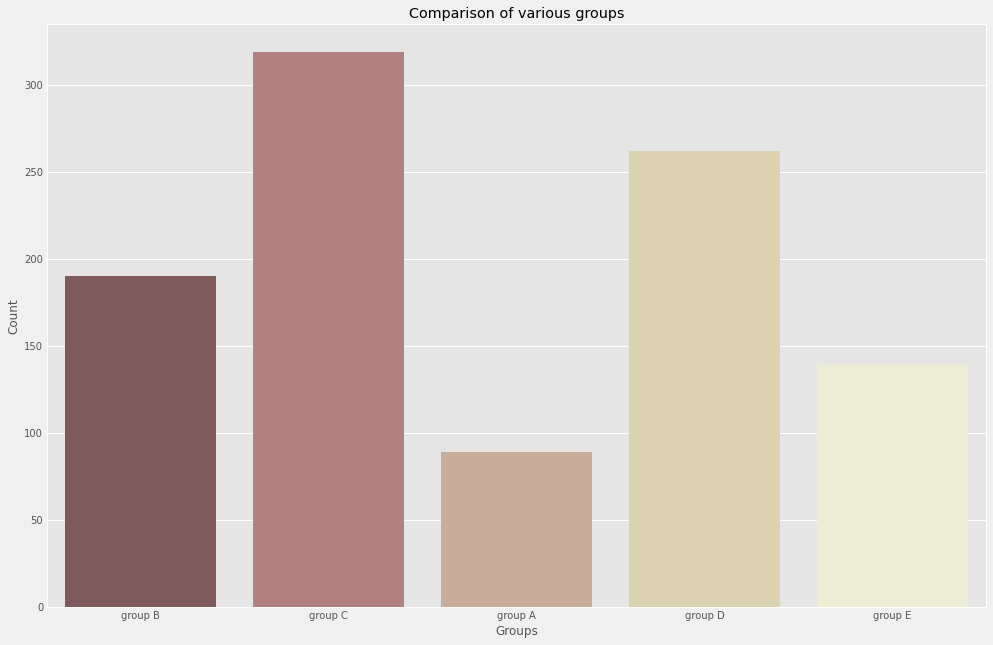

In [25]:
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
sns.countplot(data['race/ethnicity'], palette='pink')
plt.title('Comparison of various groups', fontweight = 30)
plt.xlabel('Groups')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


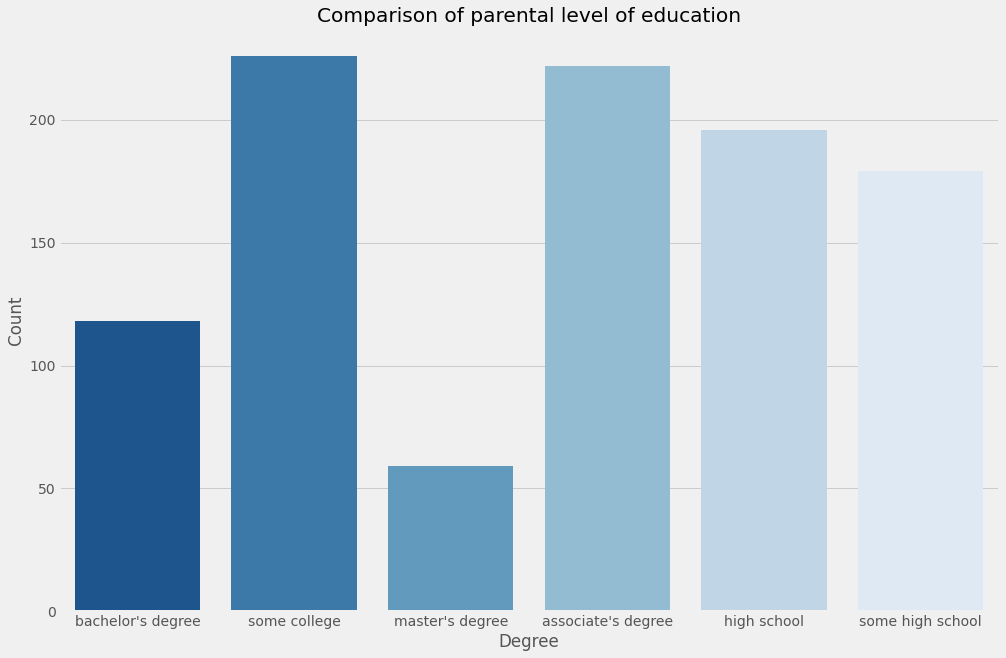

In [27]:
plt.figure(figsize=(15,10))
plt.style.use('fivethirtyeight')
sns.countplot(data['parental level of education'], palette='Blues_r')
plt.title('Comparison of parental level of education', fontweight = 30)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


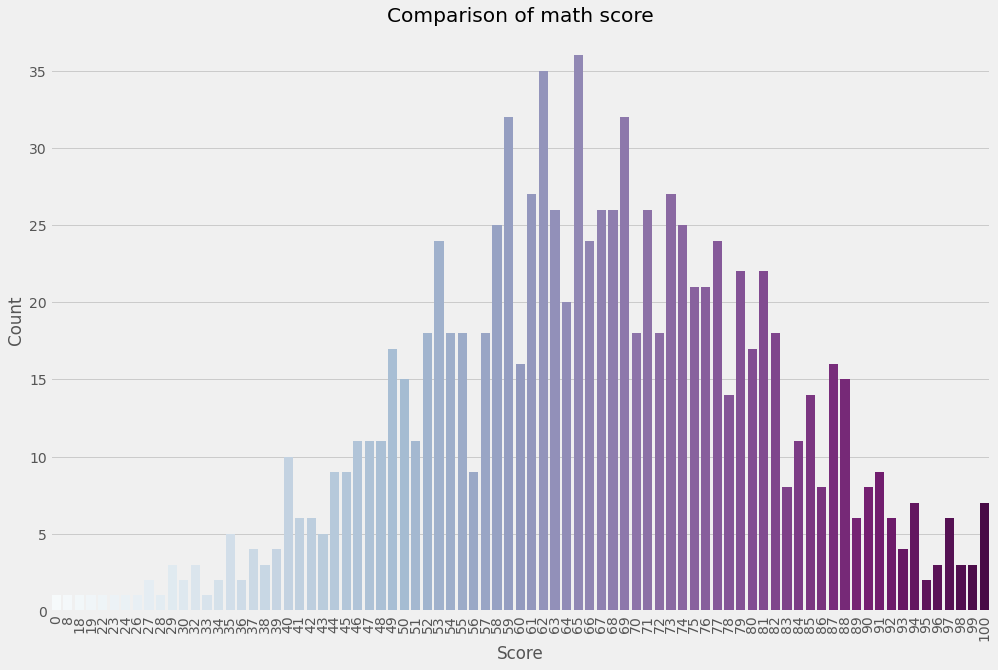

In [31]:
plt.figure(figsize=(15,10))
plt.style.use('tableau-colorblind10')
sns.countplot(data['math score'], palette='BuPu')
plt.title('Comparison of math score', fontweight = 30)
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


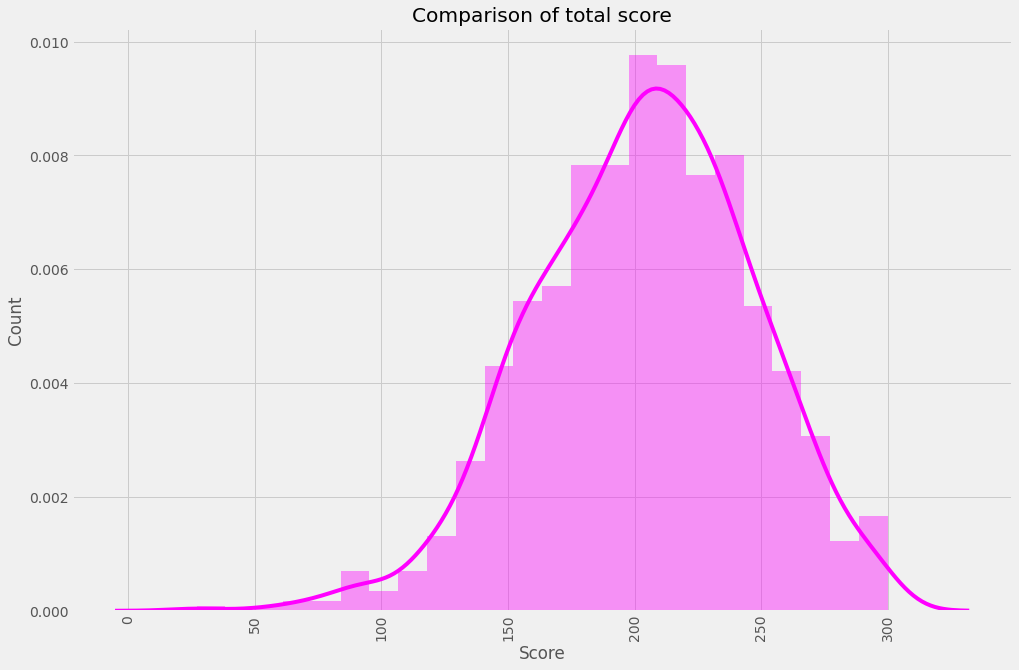

In [32]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
plt.figure(figsize=(15,10))

sns.distplot(data['total score'], color='magenta')
plt.title('Comparison of total score', fontweight = 30)
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


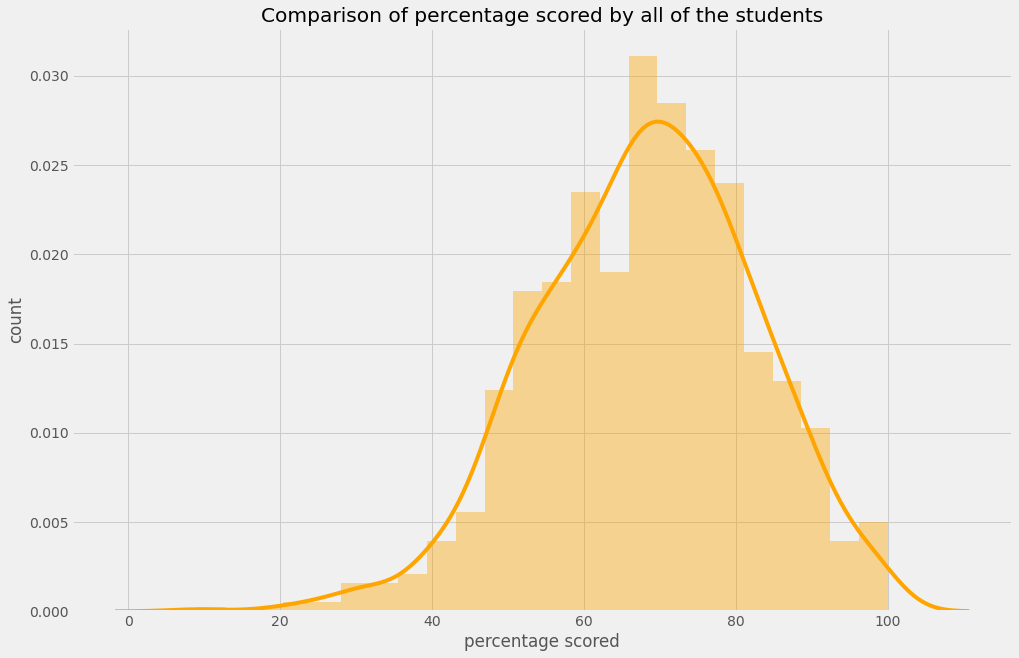

In [34]:
data['percentage'] = data['total score']/3

for i in range(0,1000):
  data['percentage'][i] = ceil(data['percentage'][i])

plt.figure(figsize=(15,10))
sns.distplot(data['percentage'], color='orange')
plt.title('Comparison of percentage scored by all of the students', fontweight=30)
plt.xlabel('percentage scored')
plt.ylabel('count')
plt.show()

In [41]:
def get_grade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else:
    return 'E'

In [42]:
data['grades'] = data.apply(lambda x: get_grade(x['percentage']), axis=1)

In [43]:
data.grades.value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64